In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist.load_data()

In [3]:
# 分离出训练集、验证集和测试集

(X_train_full, y_train_full), (X_test, y_test) = data

X_train, X_val = X_train_full[:55000] / 255.0, X_train_full[55000:] / 255.0

y_train, y_val = y_train_full[:55000], y_train_full[55000:]

# 书中的300$\times$100的MLP

In [4]:
model_book = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_book.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
model_book.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 113us/sample - loss: 0.7248 - accuracy: 0.7611 - val_loss: 0.5327 - val_accuracy: 0.8114
Epoch 2/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.4857 - accuracy: 0.8306 - val_loss: 0.4550 - val_accuracy: 0.8382
Epoch 3/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.4403 - accuracy: 0.8455 - val_loss: 0.4125 - val_accuracy: 0.8512
Epoch 4/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.4126 - accuracy: 0.8565 - val_loss: 0.4095 - val_accuracy: 0.8514
Epoch 5/30
55000/55000 [==============================] - 5s 92us/sample - loss: 0.3924 - accuracy: 0.8634 - val_loss: 0.3887 - val_accuracy: 0.8594
Epoch 6/30
55000/55000 [==============================] - 5s 91us/sample - loss: 0.3766 - accuracy: 0.8668 - val_loss: 0.3781 - val_accuracy: 0.8654
Epoch 7/30
55000/55000 [==============================] 

# 300$\times$300的MLP还不如300$\times$100的

In [7]:
model_me = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_me.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_me.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

# 一层MLP又如何呢？

In [9]:
model_one_layer = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model_one_layer.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_one_layer.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 99us/sample - loss: 0.7288 - accuracy: 0.7671 - val_loss: 0.5447 - val_accuracy: 0.8072
Epoch 2/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.5115 - accuracy: 0.8281 - val_loss: 0.4679 - val_accuracy: 0.8350
Epoch 3/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4681 - accuracy: 0.8390 - val_loss: 0.4409 - val_accuracy: 0.8452
Epoch 4/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4435 - accuracy: 0.8467 - val_loss: 0.4194 - val_accuracy: 0.8494
Epoch 5/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4238 - accuracy: 0.8543 - val_loss: 0.4118 - val_accuracy: 0.8542
Epoch 6/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.4111 - accuracy: 0.8573 - val_loss: 0.4152 - val_accuracy: 0.8484
Epoch 7/30
55000/55000 [==============================] -

# 抽象出一个过程用于测试不同的神经网络

In [19]:
def train_model(acf='relu', layers=1, units=100, optimizer='sgd', batch_size=32, epochs=30):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(300, activation=acf))
    if layers == 2:
        model.add(keras.layers.Dense(units, activation=acf))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'], batch_size=batch_size)

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)
    return model

# 测试不同的batch_size的影响

In [14]:
train_model(batch_size=4096)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 94us/sample - loss: 0.7260 - accuracy: 0.7656 - val_loss: 0.5363 - val_accuracy: 0.8172
Epoch 2/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.5106 - accuracy: 0.8282 - val_loss: 0.4785 - val_accuracy: 0.8346
Epoch 3/30
55000/55000 [==============================] - 5s 89us/sample - loss: 0.4668 - accuracy: 0.8399 - val_loss: 0.4823 - val_accuracy: 0.8278
Epoch 4/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.4419 - accuracy: 0.8477 - val_loss: 0.4238 - val_accuracy: 0.8488
Epoch 5/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4246 - accuracy: 0.8539 - val_loss: 0.4197 - val_accuracy: 0.8504
Epoch 6/30
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4093 - accuracy: 0.8587 - val_loss: 0.4116 - val_accuracy: 0.8540
Epoch 7/30
55000/55000 [==============================] -

In [18]:
def plot_history(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [20]:
train_model(epochs=60)

Train on 55000 samples, validate on 5000 samples
Epoch 1/60
55000/55000 [==============================] - 5s 94us/sample - loss: 0.7378 - accuracy: 0.7648 - val_loss: 0.5370 - val_accuracy: 0.8160
Epoch 2/60
55000/55000 [==============================] - 5s 88us/sample - loss: 0.5122 - accuracy: 0.8276 - val_loss: 0.4793 - val_accuracy: 0.8330
Epoch 3/60
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4678 - accuracy: 0.8407 - val_loss: 0.4452 - val_accuracy: 0.8406
Epoch 4/60
55000/55000 [==============================] - 5s 89us/sample - loss: 0.4426 - accuracy: 0.8487 - val_loss: 0.4291 - val_accuracy: 0.8482
Epoch 5/60
55000/55000 [==============================] - 5s 91us/sample - loss: 0.4247 - accuracy: 0.8542 - val_loss: 0.4113 - val_accuracy: 0.8508
Epoch 6/60
55000/55000 [==============================] - 5s 87us/sample - loss: 0.4094 - accuracy: 0.8593 - val_loss: 0.3980 - val_accuracy: 0.8596
Epoch 7/60
55000/55000 [==============================] -

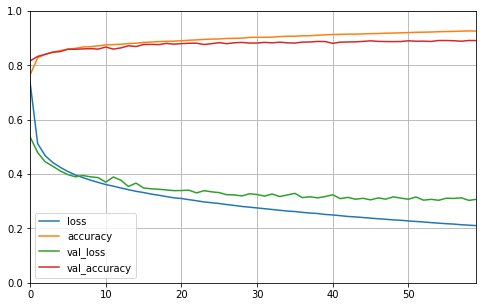

In [21]:
plot_history(Out[20].history)

In [68]:
mlp_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 5s 104us/sample - loss: 137.8350 - accuracy: 0.1497 - val_loss: 2.2110 - val_accuracy: 0.1352
Epoch 2/15
50000/50000 [==============================] - 5s 93us/sample - loss: 2.1851 - accuracy: 0.1595 - val_loss: 2.1373 - val_accuracy: 0.1641
Epoch 3/15
50000/50000 [==============================] - 5s 93us/sample - loss: 2.1678 - accuracy: 0.1577 - val_loss: 2.1329 - val_accuracy: 0.1615
Epoch 4/15
50000/50000 [==============================] - 5s 93us/sample - loss: 2.1556 - accuracy: 0.1628 - val_loss: 2.7548 - val_accuracy: 0.1597
Epoch 5/15
50000/50000 [==============================] - 5s 93us/sample - loss: 2.1864 - accuracy: 0.1581 - val_loss: 2.1501 - val_accuracy: 0.1592
Epoch 6/15
50000/50000 [==============================] - 5s 93us/sample - loss: 2.1545 - accuracy: 0.1625 - val_loss: 2.1314 - val_accuracy: 0.1697
Epoch 7/15
50000/50000 [=============================

In [69]:
history1 = Out[68]

In [70]:
history1.history

{'loss': [137.83496562049865,
  2.1851256660461424,
  2.167754002761841,
  2.1555543989562986,
  2.1864198742675782,
  2.1544923009490966,
  2.1014642978668214,
  2.1741384957885743,
  2.1643266764068603,
  2.1722551221466064,
  2.183586320266724,
  2.1694371631622316,
  2.1669194065093995,
  2.1557152908325197,
  2.188130616989136],
 'accuracy': [0.14972,
  0.15946,
  0.15772,
  0.16284,
  0.15812,
  0.16248,
  0.18032,
  0.15894,
  0.16412,
  0.16736,
  0.15614,
  0.15538,
  0.1591,
  0.17466,
  0.15224],
 'val_loss': [2.2110027633666993,
  2.137294454574585,
  2.1329201959609985,
  2.754766858673096,
  2.1500712076187134,
  2.1313653217315673,
  2.1077076828002927,
  2.157736166000366,
  2.161584049987793,
  2.1794673847198487,
  2.219008293914795,
  2.15141854057312,
  2.204770143890381,
  2.159594707107544,
  2.1895825099945068],
 'val_accuracy': [0.1352,
  0.1641,
  0.1615,
  0.1597,
  0.1592,
  0.1697,
  0.1694,
  0.1572,
  0.2225,
  0.1631,
  0.1336,
  0.159,
  0.138,
  0.1528,

In [71]:
mlp_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 94us/sample - loss: 2.1692 - accuracy: 0.1555 - val_loss: 2.1651 - val_accuracy: 0.1623
Epoch 2/30
50000/50000 [==============================] - 5s 94us/sample - loss: 2.1466 - accuracy: 0.1611 - val_loss: 2.1797 - val_accuracy: 0.1621
Epoch 3/30
50000/50000 [==============================] - 5s 94us/sample - loss: 2.1488 - accuracy: 0.1630 - val_loss: 2.1615 - val_accuracy: 0.1603
Epoch 4/30
50000/50000 [==============================] - 5s 95us/sample - loss: 2.1363 - accuracy: 0.1657 - val_loss: 2.1361 - val_accuracy: 0.1614
Epoch 5/30
50000/50000 [==============================] - 5s 94us/sample - loss: 2.1255 - accuracy: 0.1683 - val_loss: 2.1944 - val_accuracy: 0.1701
Epoch 6/30
50000/50000 [==============================] - 5s 94us/sample - loss: 2.1328 - accuracy: 0.1658 - val_loss: 2.1367 - val_accuracy: 0.1691
Epoch 7/30
50000/50000 [==============================] 

In [72]:
mlp_model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

mlp_model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [74]:
mlp_model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 6s 114us/sample - loss: 41710096084144987570176.0000 - accuracy: 0.0986 - val_loss: 2.3116 - val_accuracy: 0.0955
Epoch 2/15
50000/50000 [==============================] - 5s 99us/sample - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3111 - val_accuracy: 0.0955
Epoch 3/15
50000/50000 [==============================] - 5s 98us/sample - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3112 - val_accuracy: 0.0968
Epoch 4/15
50000/50000 [==============================] - 5s 99us/sample - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3111 - val_accuracy: 0.0968
Epoch 5/15
50000/50000 [==============================] - 5s 99us/sample - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3111 - val_accuracy: 0.0968
Epoch 6/15
50000/50000 [==============================] - 5s 98us/sample - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3111 - val_accuracy: 0.0955
Epoch 7/15
50000/50000 [=========

In [75]:
mlp_model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

mlp_model3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
mlp_model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 111us/sample - loss: 1.1014 - accuracy: 0.6852 - val_loss: 0.7320 - val_accuracy: 0.7533
Epoch 2/10
50000/50000 [==============================] - 5s 98us/sample - loss: 0.6596 - accuracy: 0.7752 - val_loss: 0.6154 - val_accuracy: 0.7842
Epoch 3/10
50000/50000 [==============================] - 5s 99us/sample - loss: 0.5878 - accuracy: 0.7960 - val_loss: 0.5758 - val_accuracy: 0.8005
Epoch 4/10
50000/50000 [==============================] - 5s 99us/sample - loss: 0.5597 - accuracy: 0.8096 - val_loss: 0.5684 - val_accuracy: 0.8027
Epoch 5/10
50000/50000 [==============================] - 5s 98us/sample - loss: 0.5474 - accuracy: 0.8098 - val_loss: 0.5615 - val_accuracy: 0.8030
Epoch 6/10
50000/50000 [==============================] - 5s 99us/sample - loss: 0.5416 - accuracy: 0.8123 - val_loss: 0.5498 - val_accuracy: 0.8003
Epoch 7/10
50000/50000 [==============================]

In [77]:
mlp_model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 98us/sample - loss: 0.5494 - accuracy: 0.8091 - val_loss: 0.5690 - val_accuracy: 0.8012
Epoch 2/30
50000/50000 [==============================] - 5s 98us/sample - loss: 0.5646 - accuracy: 0.8040 - val_loss: 0.5706 - val_accuracy: 0.7996
Epoch 3/30
50000/50000 [==============================] - 5s 98us/sample - loss: 0.5575 - accuracy: 0.8071 - val_loss: 0.5660 - val_accuracy: 0.7946
Epoch 4/30
50000/50000 [==============================] - 5s 98us/sample - loss: 0.5594 - accuracy: 0.8041 - val_loss: 0.5578 - val_accuracy: 0.8063
Epoch 5/30
50000/50000 [==============================] - 5s 98us/sample - loss: 0.5668 - accuracy: 0.8022 - val_loss: 0.5751 - val_accuracy: 0.7916
Epoch 6/30
50000/50000 [==============================] - 5s 99us/sample - loss: 0.5615 - accuracy: 0.8056 - val_loss: 0.5705 - val_accuracy: 0.8044
Epoch 7/30
50000/50000 [==============================] 

损失函数从relu换成sigmoid之后，loss和accuracy明显提高了

# 这次增大训练集，缩小验证集

In [79]:
len(X_train_full)

60000

In [80]:
X_train1, X_val1 = X_train_full[:59000], X_train_full[59000:]
y_train1, y_val1 = y_train_full[:59000], y_train_full[59000:]

In [81]:
mlp_model59000 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

mlp_model59000.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [82]:
mlp_model59000.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30)

Train on 59000 samples, validate on 1000 samples
Epoch 1/30
59000/59000 [==============================] - 6s 96us/sample - loss: 2428398093705172484096.0000 - accuracy: 0.0990 - val_loss: 2.3032 - val_accuracy: 0.0850
Epoch 2/30
59000/59000 [==============================] - 5s 87us/sample - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.0850
Epoch 3/30
59000/59000 [==============================] - 5s 86us/sample - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3025 - val_accuracy: 0.0900
Epoch 4/30
59000/59000 [==============================] - 5s 86us/sample - loss: 2.3026 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0900
Epoch 5/30
59000/59000 [==============================] - 5s 85us/sample - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.0840
Epoch 6/30
59000/59000 [==============================] - 5s 86us/sample - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.0850
Epoch 7/30
59000/59000 [============

KeyboardInterrupt: 

In [83]:
mlp_model59000s = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(300, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

mlp_model59000s.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [84]:
mlp_model59000s.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=15)

Train on 59000 samples, validate on 1000 samples
Epoch 1/15
59000/59000 [==============================] - 6s 100us/sample - loss: 1.0714 - accuracy: 0.6991 - val_loss: 0.6904 - val_accuracy: 0.7750
Epoch 2/15
59000/59000 [==============================] - 5s 86us/sample - loss: 0.6321 - accuracy: 0.7880 - val_loss: 0.5930 - val_accuracy: 0.7830
Epoch 3/15
59000/59000 [==============================] - 5s 85us/sample - loss: 0.5748 - accuracy: 0.8039 - val_loss: 0.5619 - val_accuracy: 0.8110
Epoch 4/15
59000/59000 [==============================] - 5s 86us/sample - loss: 0.5562 - accuracy: 0.8083 - val_loss: 0.5550 - val_accuracy: 0.8040
Epoch 5/15
59000/59000 [==============================] - 5s 86us/sample - loss: 0.5483 - accuracy: 0.8105 - val_loss: 0.5733 - val_accuracy: 0.8080
Epoch 6/15
59000/59000 [==============================] - 5s 85us/sample - loss: 0.5476 - accuracy: 0.8099 - val_loss: 0.5432 - val_accuracy: 0.8100
Epoch 7/15
59000/59000 [==============================] 

还是无法达到90%以上——只是80%

# 这次对输入数据做个标准化

In [85]:
X_train_full_std = X_train_full / 255

如果这样做是有效的，那么除以200呢？300呢？2呢？3呢？

In [89]:
X_train_std, X_val_std = X_train_full_std[:55000], X_train_full_std[55000:]
y_train_std, y_val_std = y_train_full[:55000], y_train_full[55000:]

首先尝试relu

In [90]:
mlp_model_relu = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

mlp_model_relu.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
mlp_model_relu.fit(X_train_std, y_train_std, validation_data=(X_val_std, y_val_std), epochs=30)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 102us/sample - loss: 0.7189 - accuracy: 0.7667 - val_loss: 0.5039 - val_accuracy: 0.8266
Epoch 2/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.4860 - accuracy: 0.8318 - val_loss: 0.4436 - val_accuracy: 0.8446
Epoch 3/30
55000/55000 [==============================] - 5s 96us/sample - loss: 0.4405 - accuracy: 0.8468 - val_loss: 0.4263 - val_accuracy: 0.8500
Epoch 4/30
55000/55000 [==============================] - 5s 94us/sample - loss: 0.4119 - accuracy: 0.8559 - val_loss: 0.4062 - val_accuracy: 0.8540
Epoch 5/30
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3918 - accuracy: 0.8631 - val_loss: 0.4198 - val_accuracy: 0.8498
Epoch 6/30
55000/55000 [==============================] - 5s 93us/sample - loss: 0.3761 - accuracy: 0.8668 - val_loss: 0.3805 - val_accuracy: 0.8640
Epoch 7/30
55000/55000 [==============================] 

In [94]:
mlp_model_relu.evaluate(X_test/255.0, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3345480281949043, 0.8826]